# Домашнее задание 3

Это домашнее задание по материалам первых трёх семинаров. Дедлайн по отправке - 02:00 3 марта. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне в Piazza через Private Post.
Файл с Вашим решением должен называться ```Surname_HW#```, где вместо ```Surname``` Вы пишите свою фамилию латиницей, а вместо ```#``` - номер домашнего задания. 
Решение каждой задачи необходимо поместить после её условия.

Пожалуйста, пишите свои решения чётко и понятно. 

## Задача 1 (2 pts)

Упражнение 1.3 из [пособия лектора](https://arxiv.org/ftp/arxiv/papers/1711/1711.00394.pdf). Пожалуйста, пишите чёткие обоснования для каждого перехода в доказательстве. Цель этой задачи мотивировать вас разобраться в том, как и почему работает концепция построения нижних оценок сложности методов оптимизации.  

$1)$Чтобы получить нижние оценки надо: зафиксировать класс функций, зафиксировать класс методов, получить самую "плохую" функцию из данного класса.

В упражнение предлагается рассмотреть следующее семество функций: $f(x) = F_{2N+1} = \frac{L}{8}(x_1^2+\sum\limits_{i=1}^{2N}(x_i-x_{i+1})^2+x_{2N+1}^2)-\frac{L}{4}x_1$.Переобозначим $2N+1 = k, f_{2N+1} = f_k = \frac{L}{8}(x_1^2+\sum\limits_{i=1}^{k-1}(x_i-x_{i+1})^2+x_{k}^2)-\frac{L}{4}x_1$. 



Посчитаем гессиан $f_k(x)$: очевидно, что все элементы, у которох номер строки или столбца больше $k$ будут нулевыми. Получается, что в матрице будет только квадратная не нулевая подматрица размера k и все остальное нули. Взяв производную, получаем, что:
$4/L\nabla^2 f_k(x) = H = \begin{pmatrix}
  2 & -1 & 0 &0& \dots &0&\\
  -1&2 &-1 & 0&0& \dots & 0&\\
  0&-1&2&-1&\dots&0&0\\
  & & -1& 2&-1&\\
  &0&0&0&0&
\end{pmatrix}$

Получается, что все компоненты, кроме $k$ первых можно положить равными нулю.

Можно заметить, что можно переписать функции в виде: $f_k(y) = \frac{L}{8}y^THy - \frac{L}{4} l_1^Ty,$ где $l_1$ - вектор, первая компонента которого равна 1, все остальные 0. Теперь чтобы получить нижнюю оценку, исследуем определенность матрицы $H$: $\forall y \in R^n \hookrightarrow y^T\nabla ^2 f_k(x)y = \frac{L}{8}(y_1^2+\sum\limits_{i=1}^{k-1}(y_i-y_{i+1})^2+y_{k}^2)\geq 0 \Rightarrow \nabla ^2 f_k(x) \succcurlyeq 0.$ Но также: $y^T\nabla ^2 f_k(x)y = \frac{L}{8}(y_1^2+\sum\limits_{i=1}^{k-1}(y_i-y_{i+1})^2+y_{k}^2)\leq \frac{L}{8}(y_1^2+\sum\limits_{i=1}^{k-1}2((y_i)^2+y_{i+1})^2)+y_{k}^2) \leq L\sum\limits_{i=1}^n (y_i)^2 = y^TLIy$. Приходим к выводу, что $LI \succcurlyeq \nabla^2 f_k(x) \succcurlyeq 0$. Следовательно функции из этого класса являются гладкими с константой $L$, а также, так как гессиан положительно определенная квадратичная форма - выпуклыми.

Так как детерминант матрицы $H$ равен 0 (есть нулевые строки), то уравнение вида $Hy - l_1 = 0$ будет иметь единственное решение $y_k^*: y_{k_i}^* = 1, i \leq k, y_{k_i}^* = 0, i \geq k $б где $l_1$ - это вектор, первая компонента которого 1, все остальные 0. То есть у фукции
 $f_k = t_k^THt_k - l_1^Tt_k$ легко найти значение в точке минимума (так как функция является выпуклой): $L/8(1/(k+1) -1) = L/8(1/(2N+2))$. 





In [0]:
# Место для Вашего решения

## Задача 2 (0.5 pts)

Покажите, что сопряжённые направления являются линейно независимыми

Рассмотрим следующую оптимизационную задачу: $$\min\limits_{\mathbf{x}^T}\frac{1}{2}\mathbf{x}^T\mathbf{A}\mathbf{x} - \mathbf{b}^T\mathbf{x}, \mathbf{A} \in \mathbb{S}{++}$$
Предположим, что сопряженные направления в методе сопряженных градиентов линейно зависимы, то есть $\exists~\mathbf{p}_t ~\exists~c\in \mathbb{R} : \mathbf{p}_t = \mathbf{Pc}, $ где $\mathbf{P}$ - матрица, составленная из векторов $\mathbf{p}_1, \mathbf{p}_2, \dots , \mathbf{p}_{t-1}$ (то есть направление на шаге $t$ представимо ввиде линейной комбинации предыдущих). $\mathbf{p}_t^T \mathbf{A}\mathbf{p}_i = 0 ~\forall i \in [1,2, \dots , t-1] $ - так как направления $\mathbf{A}$-ортогональны. Следовательно, $\mathbf{(Pc)}^T\mathbf{A}\mathbf{p}_i = 0 \Rightarrow c_i\mathbf{p}_i^T\mathbf{A} \mathbf{p}_i = 0 ~\forall i \in [1,2, \dots , t-1] $. Так как матрица положительно определенная, следовательно, $\mathbf{p}_i^T\mathbf{A} \mathbf{p}_i>  0 \Rightarrow c_i = 0 ~\forall i$. Получаем, что линейная комбинация является тривиальной.

Полученное утверждение логично в том смысле, что на каждой новой иттерации $x_t$ выбирается из линейного пространства $\langle p_0, p_1, \dots, p_{t-1}\rangle + x_0$. Если бы направления были линейно зависимыми, то каждая новая иттерация никак бы не отличалась от предущей, так как движение бы происходило в одном и том же простравнстве.

## Задача 3 (5 pts)

- (2 pts) Проверьте, что направления в методе сопряжённых градиентов для квадратичной целевой функции и в методе Флетчера-Ривса являются направлениями убывания. Для любой ли стратегии линейного поиска шага в методе Флетчера-Ривса полученное направление будет направлением убывания? Почему?

- (3 pts) Даёт ли процедура дробления шага шаг, удовлестворяющий условию Вольфа? Если нет, то почему и как её нужно модифицировать, чтобы найти шаг, удовлетворяющий условию Вольфа? Покажите экспериментально, что предложенная Вами процедура работает.

In [0]:
# Место для Вашего решения

$1)$ Для квадратичной функции:$x_{t+1} = x_t + \alpha p_t$, причем $p_{t+1} = - \nabla f(x_t) + \beta_t p_t$. Найдем коэффицент $\alpha_t: f'_{\alpha} = 0 = \nabla f(x_t)^Tp_t = (Ax_t - b)^Tp_t = (A(\sum\limits_{i=1}^{t-1}\alpha_ip_i)+Ax_0 - b)^Tp_t = (Ax_0-b)^Tp_t \Rightarrow p_t^TA(x^*-x_0) = \alpha_t p_t^TAp_t\Rightarrow \alpha_t = \frac{p_t^TA(x^*-x_0)}{\|p_t\|_A^2} = \frac{-p_t^T\nabla f(x_t)}{p_t^TAp_t}.$

Заметим, что $\nabla f(x_{t+1}) = Ax_{t+1}-b = A(x_t +\alpha_tp_t) - b = \nabla f(x_t) +\alpha_tAp_t$. Тогда можно сделать следующее уверждение: $ p_t^T\nabla f(x_{t+1}) = p_t^T(\nabla f(x_t) + \alpha_tAp_t) = 0.$  Теперь рассмотрим $\nabla f(x_t)^Tp_t = \nabla f(x_t)^T (-\nabla f(x_t) + \beta p_{t-1}) = -\|\nabla f(x_t)\|_2^2 < 0$. Следовательно, направления в методе сопряженных градиентов являются направлениями убывания. 

$2)$ Проверим тоже самое для случая, когда функция не является квадратичной:
$$ p_{t} = -\nabla f(x_t) + \beta_k p_{t-1}, \beta_k = \frac{\|\nabla f(x_k)\|_2^2}{\|\nabla f(x_{k-1})\|_2^2}$$

Домножим скалярно правую и левую части на $\nabla f(x_k)$: $\nabla f(x_k)^Tp_k = - \|\nabla f(x_k)\|_2^2 + \frac{\|\nabla f(x_k)\|_2^2}{\|\nabla f(x_{k-1})\|_2^2}\nabla f(x_t)^Tp_{k-1}$. Если вункция $f$ является квадратичной, то направление является направлением убывания, так как (было доказано выше) $\nabla f(x_k)^T p_{k-1} = 0$. Если функция не является квадратичной, тогда $\nabla f(x_k)$: $\nabla f(x_k)^Tp_k = - \|\nabla f(x_k)\|_2^2( 1 - \frac{\nabla f(x_k)^T p_{k-1}}{\|\nabla f(x_{k-1}\|_2^2}).$ Если получается так, что $\frac{\nabla f(x_k)^T p_{k-1}}{\|\nabla f(x_{k-1})\|_2^2}   > 1$, то направление не является направлением убывания.

Мне кажется, так происходит, потому что точно найти $\alpha_k$ (решить задачу одномерной оптимизации) удается очень редко. В связи с этим, на каждой иттерации добавляется ошибка (грубо говоря, идя из $x_k$ точки в $x_{k+1}$ алгоритм ошибается и в результате чего ошибка накапливается). Именно в силу написанного выше часто используется условие вида: $|\frac{\nabla f(x_k)^T \nabla f(x_{k-1})}{\|\nabla f(x_k)\|_2^2}| \geq 0.1$. Мне кажется также, что это условие основано на том, что в квадратичной задаче соседние градиенты являются ортогональны. То есть если градиенты становятся "сильно не ортогональными" (накапливается ошибка), то все обнуляется и делается $restart$.

$3)$ Условие Вольфа: $$f(x_k + \alpha_k p_k) < f(x_k)+ c_1 \alpha \nabla f_k^Tp_k, c_1 \in [0,1]$$ $$ |\nabla f(x_k+\alpha_kp_k)^Tp_k| \leq -c_2\nabla f(x_k)^Tp_k$$. Процедура дробления шага заключается в следующем: когда невозможно решитьь задачу одномерной оптимизации в линойном поиске шага, поступают следующим образом: выбирают некоторые числа $\alpha_0$ и $0<\beta<1$ и подбирают $n$ таким, что $\alpha  = \beta^n \alpha_0$ удовлетворяет условию Армихо (первое неравенство из строгих условий Вольфа). Очевидно, что найденны таким образом может не удовлетворять второму неравенству из условий Вольфа, в следствии чего выбранное направление $p_k$ может не являться направлением убывания.

В [статье](http://www.apmath.spbu.ru/cnsa/pdf/monograf/Numerical_Optimization2006.pdf)(страница 126, лемма 5.6) доказано, что если брать константу $c_2$ из $(0,1/2)$, то выбир $\alpha_k$ с помощью процедуры дробления шага всегда будет приводить к нахождению направления убывания.

## Задача 4 (4 pts)

Исследуйте зависимость числа итераций необходимого для сходимости линейного метода сопряжённых градиентов от распределения собственных значений матрицы $A$. 
Рассмотрите следующие сценарии:

- собственные значения распределены равномерно на некотором отрезке
- собственные числа распределены блоками около некоторых заданных чисел в окрестности радиуса $\varepsilon$, например каждые 5 собственных значений находятся в окрестности радиуса $0.5$ около чисел кратных 5. Придумайте свою стратегию генерации матриц по заданному сценарию

Постройте соответствующий график для каждого сценария. Если сценарий зависит от параметра, то на одном графике изобразите зависимость для нескольких наиболее характерных параметров, добавьте легенду и сделайте вывод об устойчивости оценки сходимости метода сопряжённых градиентов относительно распределение спектра матрицы.

1) **собственные значения распределены равномерно на некотором отрезке**

За параметр беру радиус отрезка и центр отрезка при вариации радиуса центр равен 10000, при вариации центра радиус равен 1.

In [1]:
# Место для Вашего решения
!pip install git+https://github.com/amkatrutsa/liboptpy

  Cloning https://github.com/amkatrutsa/liboptpy to /tmp/pip-req-build-xxo10e_7
  Running command git clone -q https://github.com/amkatrutsa/liboptpy /tmp/pip-req-build-xxo10e_7
  Created wheel for liboptpy: filename=liboptpy-0.0.1-cp36-none-any.whl size=11730 sha256=66873237d999ffc14e9aa9b4c1f81f575e8b2d6de79404f1a8c7ba67c7b013ed
  Stored in directory: /tmp/pip-ephem-wheel-cache-4dlrh0ko/wheels/8e/6e/38/60496dcf12f2c341e42d932d1403bdaaa17049556fdaba8d40
Successfully built liboptpy


In [0]:
# собственные значения распределены равномерно на некотором отрезке
# за параметр беру радиус отрезка и центр отрезка

import numpy as np
import random
n = 100
param = np.array([1e-6,0.0001,0.001, 1, 10, 1000,10000])
matrix = []
functions = []
grads = []
b = np.random.randn(n)
U = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
for p in param:
  A = np.diagflat([random.uniform(100000-p, 100000+p) for i in range(n)]) 
  A = Q.dot(A).dot(Q.T)
  A = (A + A.T) * 0.5
  matrix.append(A)
  f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
  grad_f = lambda x: A.dot(x) - b
  functions.append(f)
  grads.append(grad_f)

x0 = np.zeros(n)

In [0]:
import scipy.optimize as scopt

def callback(x, array):
    array.append(x)

In [0]:
def ConjugateGradientQuadratic(x0, A, b, tol=1e-8, callback=None):
    x = x0
    r = A.dot(x0) - b
    p = -r
    while np.linalg.norm(r) > tol:
        alpha = r.dot(r) / p.dot(A.dot(p))
        x = x + alpha * p
        if callback is not None:
            callback(x)
        r_next = r + alpha * A.dot(p)
        beta = r_next.dot(r_next) / r.dot(r)
        p = -r_next + beta * p
        r = r_next
    return x

In [0]:
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss
cg_quad = []
x_cg = []

for j in enumerate(param):
  cg = methods.fo.ConjugateGradientQuad(matrix[j[0]], b)
  cg_quad.append(cg)
  x_cg = cg.solve(x0, tol=1e-7, disp=True)



Convergence in 1 iterations
Function value = -0.0005216654518663061
Norm of gradient = 5.769457229575725e-11
Convergence in 1 iterations
Function value = -0.0005216654519472791
Norm of gradient = 5.5777664429439785e-09
Convergence in 1 iterations
Function value = -0.0005216654520731681
Norm of gradient = 5.047403914313461e-08
Convergence in 2 iterations
Function value = -0.0005216658701642198
Norm of gradient = 2.9826393736278017e-10
Convergence in 2 iterations
Function value = -0.0005216617931641322
Norm of gradient = 2.939979850561615e-08
Convergence in 4 iterations
Function value = -0.0005220563777726331
Norm of gradient = 7.1279166459923034e-09
Convergence in 7 iterations
Function value = -0.0005263045318893686
Norm of gradient = 9.897569537998982e-09


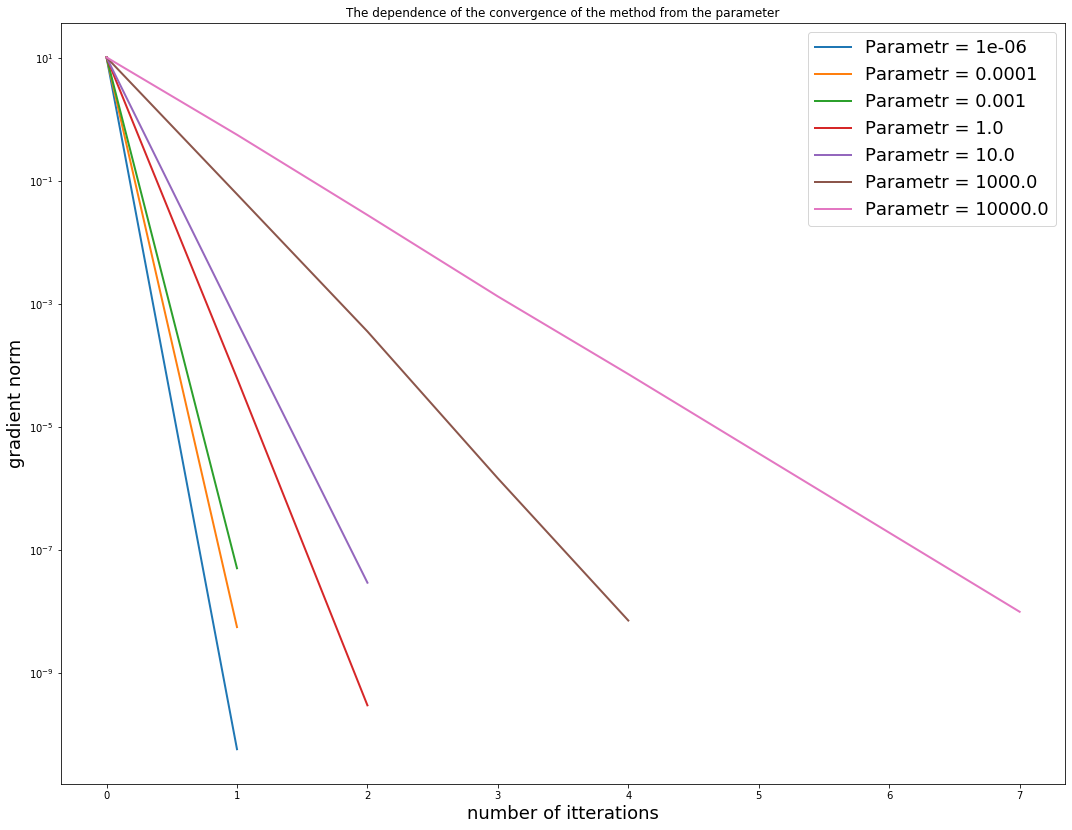

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,14))
for j in enumerate(param):
  grad_f = lambda x: matrix[j[0]].dot(x) - b
  plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_quad[j[0]].get_convergence()], linewidth=2, label = 'Parametr = {}'.format(j[1]))
  plt.legend(loc="best", fontsize=18)
plt.xlabel("number of itterations", fontsize=18)
plt.ylabel("gradient norm", fontsize=18)
plt.title("The dependence of the convergence of the method from the radious")
plt.show()

Convergence in 1 iterations
Function value = -0.0005216654518663061
Norm of gradient = 5.769457229575725e-11
Convergence in 1 iterations
Function value = -0.0005216654519472791
Norm of gradient = 5.5777664429439785e-09
Convergence in 1 iterations
Function value = -0.0005216654520731681
Norm of gradient = 5.047403914313461e-08
Convergence in 2 iterations
Function value = -0.0005216658701642198
Norm of gradient = 2.9826393736278017e-10
Convergence in 2 iterations
Function value = -0.0005216617931641322
Norm of gradient = 2.939979850561615e-08
Convergence in 4 iterations
Function value = -0.0005220563777726331
Norm of gradient = 7.1279166459923034e-09
Convergence in 7 iterations
Function value = -0.0005263045318893686
Norm of gradient = 9.897569537998982e-09


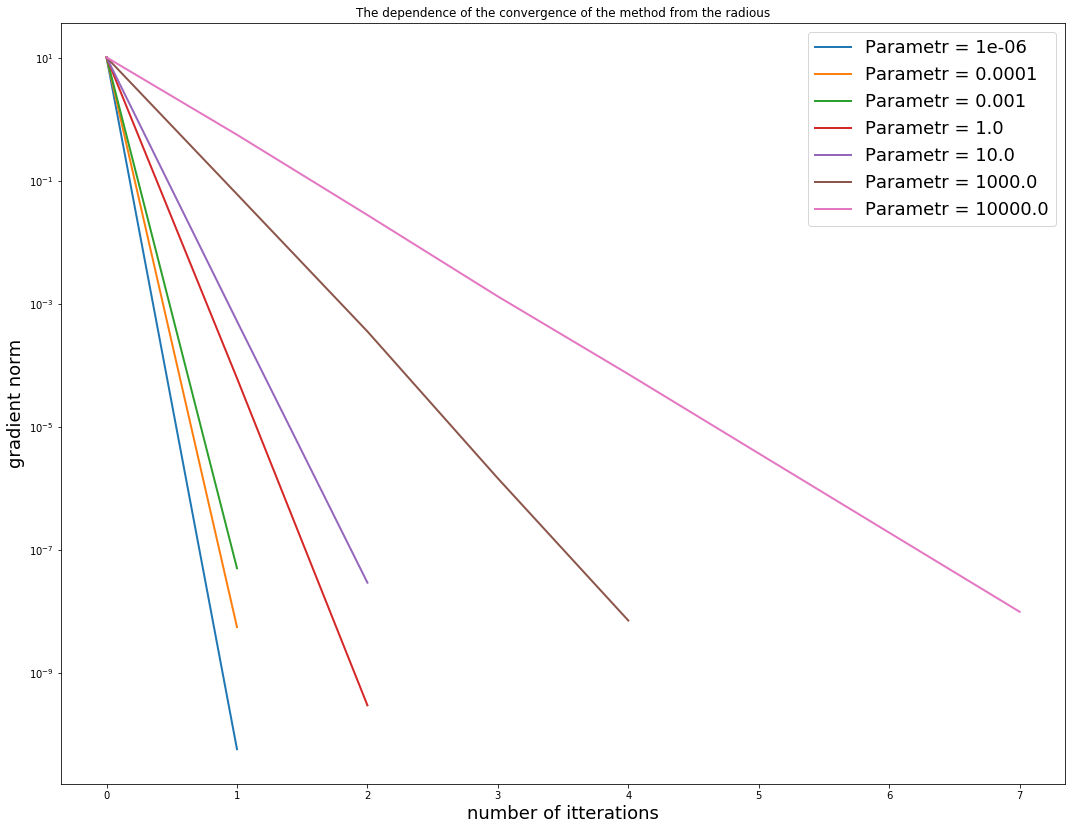

In [0]:
for p in param:
  A = np.diagflat([random.uniform(p-1, p+1) for i in range(n)]) 
  A = Q.dot(A).dot(Q.T)
  A = (A + A.T) * 0.5
  matrix.append(A)
  f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
  grad_f = lambda x: A.dot(x) - b
  functions.append(f)
  grads.append(grad_f)
cg_quad = []
x_cg = []

for j in enumerate(param):
  cg = methods.fo.ConjugateGradientQuad(matrix[j[0]], b)
  cg_quad.append(cg)
  x_cg = cg.solve(x0, tol=1e-7, disp=True)
plt.figure(figsize=(18,14))
for j in enumerate(param):
  grad_f = lambda x: matrix[j[0]].dot(x) - b
  plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_quad[j[0]].get_convergence()], linewidth=2, label = 'Parametr = {}'.format(j[1]))
  plt.legend(loc="best", fontsize=18)
plt.xlabel("number of itterations", fontsize=18)
plt.ylabel("gradient norm", fontsize=18)
plt.title("The dependence of the convergence of the method from the radious")
plt.show()

$2)$ Сценирий:

Будем делать следующим образом: возьмем 20 чисел кратные 5 , получаем 20 кластеров, в каждом из которых 5+1 = 6 чисел (одно из них кратно 5). Каким образом будем генерировать матрицу: сначала сгенерируем 20 чисел, кратных 5, затем для каждого такого числа сгенерируем "соседей", из полученных 120 чисел составим диагональную матриц и далее поступаем так, как в 1 пункте.

In [0]:
a = np.random.randint(0, 100, 20)*5
epsilon = 0.5
n = 520
A = np.diag([random.uniform(0,1000 ) for i in range(n)]) 
klasters = []
for i in enumerate(a):
  klasters.extend([i[1]]+[random.normalvariate(i[1], epsilon) for j in range(25)])
B = np.diag(klasters)
b = np.random.randn(n)
U = np.random.rand(n, n)
U_ = np.random.rand(n, n)
Q, _ = np.linalg.qr(U)
A = Q.dot(A).dot(Q.T)
A = (A + A.T) * 0.5
B = Q.dot(B).dot(Q.T)
b = np.random.rand(n)
f = lambda x: 0.5 * x.dot(A.dot(x)) - b.dot(x)
grad_f = lambda x: A.dot(x) - b
f_ = lambda x: 0.5 * x.dot(B.dot(x)) - b.dot(x)
grad_f_ = lambda x: B.dot(x) - b

x0 = np.zeros(n)

In [0]:
print("A is normal matrix: ||AA* - A*A|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))

A is normal matrix: ||AA* - A*A|| = 0.0


In [0]:
print("A is normal matrix: ||BB* - B*B|| =", np.linalg.norm(A.dot(A.T) - A.T.dot(A)))

A is normal matrix: ||BB* - B*B|| = 0.0


In [0]:
cg_quad_a = methods.fo.ConjugateGradientQuad(A, b)
x_cg_a = cg_quad_a.solve(x0, tol=1e-7, disp=True)
cg_quad_b = methods.fo.ConjugateGradientQuad(B, b)
x_cg_b = cg_quad_b.solve(x0, tol=1e-7, disp=True)

Maximum iteration exceeds!
Convergence in 100 iterations
Function value = -0.2374830766168515
Norm of gradient = 0.00011160994824749234
Convergence in 22 iterations
Function value = -0.2981610788359438
Norm of gradient = 9.452167518861807e-08


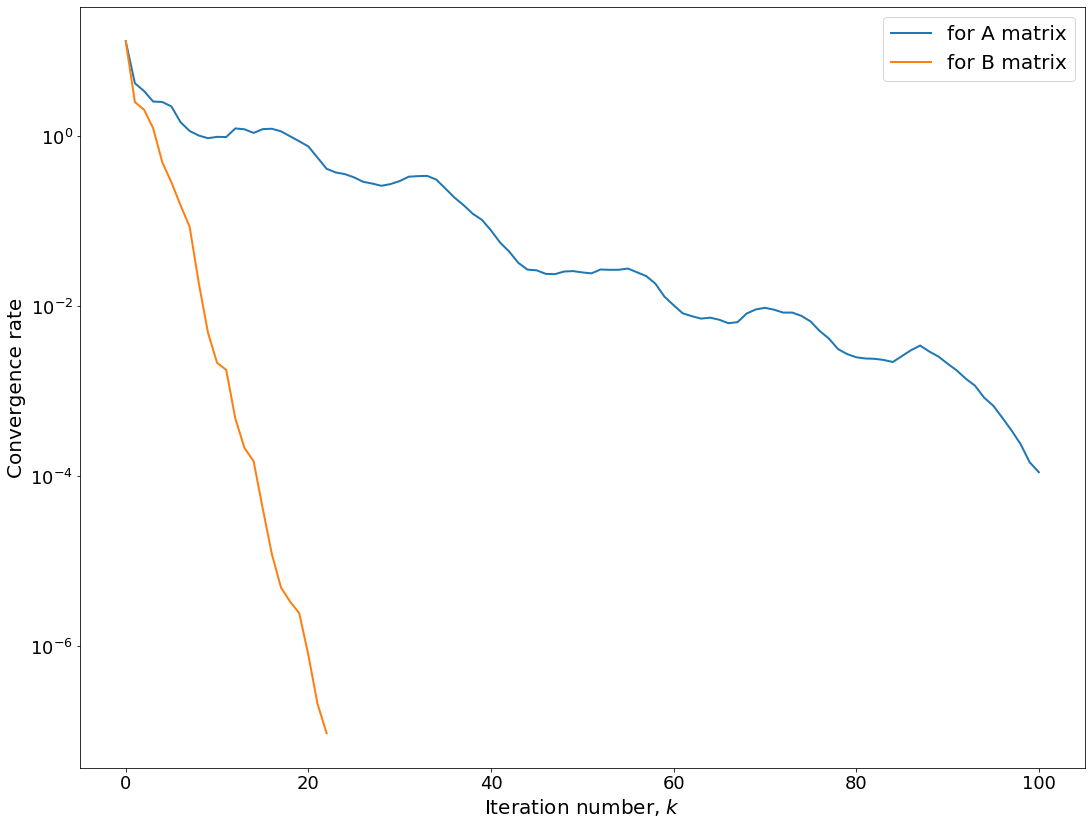

In [0]:
plt.figure(figsize=(18,14))
plt.semilogy([np.linalg.norm(grad_f(x)) for x in cg_quad_a.get_convergence()], label="for A matrix", linewidth=2)
plt.semilogy([np.linalg.norm(grad_f_(x)) for x in cg_quad_b.get_convergence()], label= "for B matrix", linewidth=2)

plt.legend(loc="best", fontsize=20)
plt.xlabel(r"Iteration number, $k$", fontsize=20)
plt.ylabel("Convergence rate", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

Должно быть наоборот по идее, так как при кластерном подходе, по идее число обучловленности должно быть больше , поэтому $q = (M-1)/(M+1)$ буде ближе к 1, следовательно, сходится должно хуже, но у меня покаким-то причинам получается наоборот)))

## Задача 5 (3 pts)

Сравните сходимость градиентного спуска, метода сопряжённых градиентов, метода тяжёлого шарика и ускоренного метода Нестерова для задачи

$$
\min_x \log \left( \sum_{i=1}^m \exp(a_i^{\top}x + b_i)\right)
$$

Матрицу $A \in \mathbb{R}^{m \times n}$ и вектор $b$ сгенерируйте случайным образом, рассмотрите различные значения $m$ и $n$ ($m > n$ и $m < n$). 
Какой способ выбора шага для каждого из методов дал наилучшую сходимость? 
Обратите внимание на то, как устойчиво вычислить значения целевой функции. Если вы будете делать это влоб, то промежуточное значение для суммы экспонент может не поместиться в числа типа ```double```

In [0]:
import liboptpy.base_optimizer as base
import liboptpy.unconstr_solvers.fo as fo
import liboptpy.step_size as ss
import liboptpy.restarts as restarts
import numpy as np

Данный метод придуман не мной, он очень хорошо описан [вот тут](https://www.hongliangjie.com/2011/01/07/logsum/). Идея в следующем: считаем максимальную компоненту вектора, получаем какое-то $m$, далее замечаем, что: $ \log \left( \sum_{i=1}^m \exp(y_i)\right) = \log \left( \sum_{i=1}^m \frac{\exp(m)}{\exp(m)}\exp(y_i)\right) = m + \log \left( \sum_{i=1}^m \exp(y_i - m)\right)$

In [0]:
np.random.seed(42)
n = 100
m = 200
A = np.random.randn(m, n)
b = np.random.randn(m)

In [0]:
def f(x):
    y = np.dot(A, x) + b
    y_max = np.max(y)

    return np.log(np.sum(np.exp(y - y_max)))
def grad(x):
    y = np.dot(A,x) + b
    y_max = np.max(y)
    return (np.dot(A.T ,np.exp(y-y_max))/(np.sum(np.exp(y-y_max))))

In [0]:
class HeavyBall(base.LineSearchOptimizer):
    def __init__(self, f, grad, step_size, beta, **kwargs):
        super().__init__(f, grad, step_size, **kwargs)
        self._beta = beta
    
    def get_direction(self, x):
        self._current_grad = self._grad(x)
        return -self._current_grad

    def _f_update_x_next(self, x, alpha, h):
        if len(self.convergence) < 2:
            return x + alpha * h
        else:
            return x + alpha * h + self._beta * (x - self.convergence[-2])
    
    def get_stepsize(self):
        return self._step_size.get_stepsize(self._grad_mem[-1], self.convergence[-1], len(self.convergence))

In [0]:
##A_eigvals = np.linalg.eigvalsh(A)
#L = np.max(A_eigvals)
##mu = np.min(A_eigvals)
#print(L, mu)#

In [0]:
beta_test = 0.9
methods = {
    "GD fixed": fo.GradientDescent(f, grad, ss.ConstantStepSize(0.1)),
    r"HB, $\beta = {}$".format(beta_test): HeavyBall(f, grad, ss.ConstantStepSize(0.1), beta=beta_test),
    "Nesterov": fo.AcceleratedGD(f, grad, ss.ConstantStepSize(0.05)),
}
x0 = np.random.randn(n)
max_iter = 2000
tol = 1e-6

In [49]:
for m in methods:
    _ = methods[m].solve(x0=x0, max_iter=max_iter, tol=tol)

Maximum iteration exceeds!
Maximum iteration exceeds!
Maximum iteration exceeds!


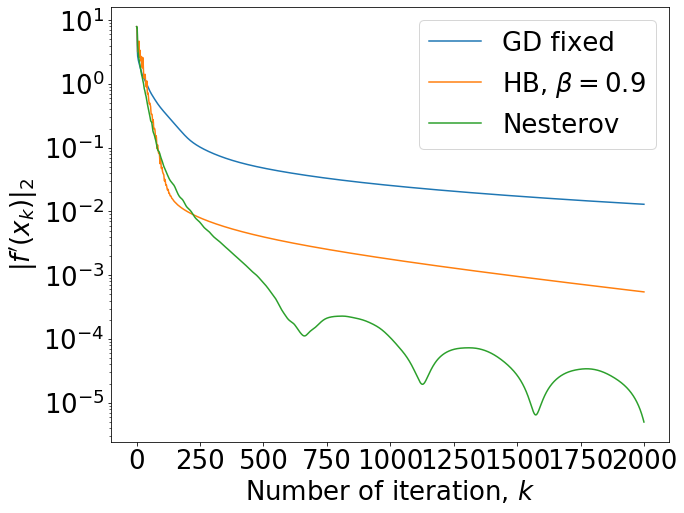

In [50]:
import matplotlib.pyplot as plt
figsize = (10, 8)
fontsize = 26
plt.figure(figsize=figsize)
for m in methods:
    plt.semilogy([np.linalg.norm(grad(x)) for x in methods[m].get_convergence()], label=m)
plt.legend(fontsize=fontsize, loc="best")
plt.xlabel("Number of iteration, $k$", fontsize=fontsize)
plt.ylabel(r"$\| f'(x_k)\|_2$", fontsize=fontsize)
plt.xticks(fontsize=fontsize)
_ = plt.yticks(fontsize=fontsize)